In [26]:
import os
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

def pandas_df(path: str, file_name: str) -> pd.DataFrame:
    """The func accepts a path and file name from kaggle website.
    params: file_name (str)
    returns: pandas dataframe
    """

    # List all files in the downloaded directory
    files = os.listdir(path)
    print(f"Files in the dataset directory: {files}")

    # Check if 'data.csv' or any csv file exists
    csv_files = [f for f in files if f.endswith('.csv')]
    if not csv_files:
        raise FileNotFoundError("No CSV files found in the dataset directory. Check the dataset content.")

    # Use the first found csv file if 'data.csv' is not found
    file_name = csv_files[0] if f"{file_name}.csv" not in csv_files else f"{file_name}.csv"


    path = os.path.join(path, file_name)
    return pd.read_csv(path)


# Download latest version
elec_path = kagglehub.dataset_download("rajkumarpandey02/electric-vehicle-population-data")
# https://www.kaggle.com/datasets/ironwolf404/electric-vehicle-population-in-usa

elec_ds = pandas_df(elec_path, 'Electric_Vehicle_Population_Data')


Files in the dataset directory: ['Electric_Vehicle_Population_Data.csv']


In [27]:
print(elec_ds.head())

   VIN (1-10)     County       City State  Postal Code  Model Year    Make  \
0  5YJ3E1EA0K   Thurston   Tumwater    WA      98512.0        2019   TESLA   
1  1N4BZ1DV4N     Island    Clinton    WA      98236.0        2022  NISSAN   
2  5YJ3E1EA0L  Snohomish  Snohomish    WA      98290.0        2020   TESLA   
3  5YJ3E1EBXL       King    Seattle    WA      98134.0        2020   TESLA   
4  5YJSA1CP0D  Snohomish    Edmonds    WA      98020.0        2013   TESLA   

     Model           Electric Vehicle Type  \
0  MODEL 3  Battery Electric Vehicle (BEV)   
1     LEAF  Battery Electric Vehicle (BEV)   
2  MODEL 3  Battery Electric Vehicle (BEV)   
3  MODEL 3  Battery Electric Vehicle (BEV)   
4  MODEL S  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1  Eligibility unknown as battery range has not b...             0.0   
2            Clean Alternative Fuel Ve

In [28]:
print(elec_ds.shape)

(135038, 17)


In [29]:
elec_ds.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [30]:
elec_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         135038 non-null  object 
 1   County                                             135030 non-null  object 
 2   City                                               135030 non-null  object 
 3   State                                              135038 non-null  object 
 4   Postal Code                                        135030 non-null  float64
 5   Model Year                                         135038 non-null  int64  
 6   Make                                               135038 non-null  object 
 7   Model                                              134789 non-null  object 
 8   Electric Vehicle Type                              135038 non-null  object

In [31]:
elec_ds.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,135030.000000,135038.000000,135037.000000,135037.000000,134726.000000,1.350380e+05,1.350300e+05
mean,98171.001577,2019.662880,74.591964,1448.407325,29.504379,2.063432e+08,5.297233e+10
std,2450.367211,3.001676,98.744120,9683.658138,14.783780,8.582417e+07,1.635783e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.606305e+08,5.303301e+10
50%,98121.000000,2021.000000,21.000000,0.000000,34.000000,2.059563e+08,5.303303e+10
75%,98370.000000,2022.000000,150.000000,0.000000,43.000000,2.308888e+08,5.305307e+10
max,99701.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [32]:
elec_ds.isna().sum()

VIN (1-10)                                             0
County                                                 8
City                                                   8
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 312
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       8
2020 Census Tract                                      8
dtype: int64

In [33]:
for feature in elec_ds.columns:
  num_missing = elec_ds[feature].isna().sum()
  total_rows = len(elec_ds)
  percentage_missing = (num_missing / total_rows) * 100
  print(f"Column '{feature}': {percentage_missing:.2f}% missing")

Column 'VIN (1-10)': 0.00% missing
Column 'County': 0.01% missing
Column 'City': 0.01% missing
Column 'State': 0.00% missing
Column 'Postal Code': 0.01% missing
Column 'Model Year': 0.00% missing
Column 'Make': 0.00% missing
Column 'Model': 0.18% missing
Column 'Electric Vehicle Type': 0.00% missing
Column 'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 0.00% missing
Column 'Electric Range': 0.00% missing
Column 'Base MSRP': 0.00% missing
Column 'Legislative District': 0.23% missing
Column 'DOL Vehicle ID': 0.00% missing
Column 'Vehicle Location': 0.01% missing
Column 'Electric Utility': 0.01% missing
Column '2020 Census Tract': 0.01% missing


In [34]:
elec_ds['Model'].value_counts()

Model
MODEL 3        25837
MODEL Y        23577
LEAF           13020
MODEL S         7473
BOLT EV         5419
               ...  
GV70               2
FLYING SPUR        1
918                1
Q8                 1
S-10 PICKUP        1
Name: count, Length: 125, dtype: int64

In [35]:
print(elec_ds.head())

   VIN (1-10)     County       City State  Postal Code  Model Year    Make  \
0  5YJ3E1EA0K   Thurston   Tumwater    WA      98512.0        2019   TESLA   
1  1N4BZ1DV4N     Island    Clinton    WA      98236.0        2022  NISSAN   
2  5YJ3E1EA0L  Snohomish  Snohomish    WA      98290.0        2020   TESLA   
3  5YJ3E1EBXL       King    Seattle    WA      98134.0        2020   TESLA   
4  5YJSA1CP0D  Snohomish    Edmonds    WA      98020.0        2013   TESLA   

     Model           Electric Vehicle Type  \
0  MODEL 3  Battery Electric Vehicle (BEV)   
1     LEAF  Battery Electric Vehicle (BEV)   
2  MODEL 3  Battery Electric Vehicle (BEV)   
3  MODEL 3  Battery Electric Vehicle (BEV)   
4  MODEL S  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1  Eligibility unknown as battery range has not b...             0.0   
2            Clean Alternative Fuel Ve

In [36]:
# Get a list of columns to drop rows from (excluding 'Model')
columns_to_consider = elec_ds.columns[elec_ds.columns != 'Model']

# Drop rows with missing values in the specified columns
elec_ds.dropna(subset=columns_to_consider, inplace=True)

In [37]:
# filling the missing values of model column with the mode
mode_value = elec_ds['Model'].mode()[0]
elec_ds['Model'] = elec_ds['Model'].fillna(mode_value)

In [38]:
elec_ds.isna().sum()


VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [39]:
num_duplicates = elec_ds.duplicated().sum()
print(f"Number of duplicate records: {num_duplicates}")


Number of duplicate records: 0


In [40]:

elec_ds.drop_duplicates(subset=['VIN (1-10)', 'County'], inplace=True)


num_duplicates = elec_ds.duplicated().sum()
print(f"Number of duplicate records: {num_duplicates}")

Number of duplicate records: 0


In [41]:
elec_ds['Model Year'] = pd.to_datetime(elec_ds['Model Year'], format='%Y', errors='coerce')



In [42]:
elec_ds['Postal Code'] = elec_ds['Postal Code'].astype(str)

In [43]:
elec_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38789 entries, 0 to 135037
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   VIN (1-10)                                         38789 non-null  object        
 1   County                                             38789 non-null  object        
 2   City                                               38789 non-null  object        
 3   State                                              38789 non-null  object        
 4   Postal Code                                        38789 non-null  object        
 5   Model Year                                         38789 non-null  datetime64[ns]
 6   Make                                               38789 non-null  object        
 7   Model                                              38789 non-null  object        
 8   Electric Vehicle Typ

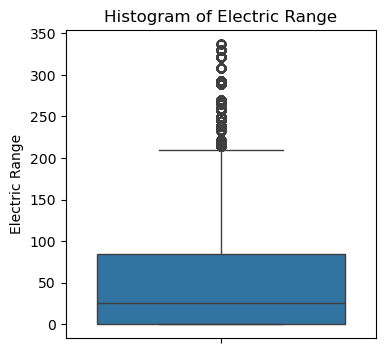

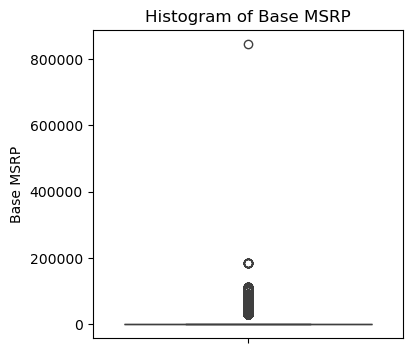

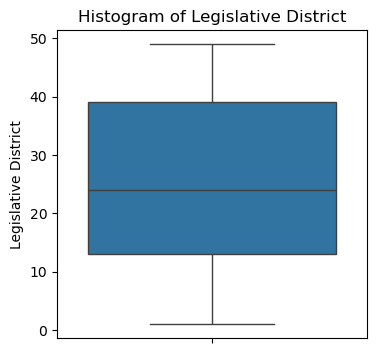

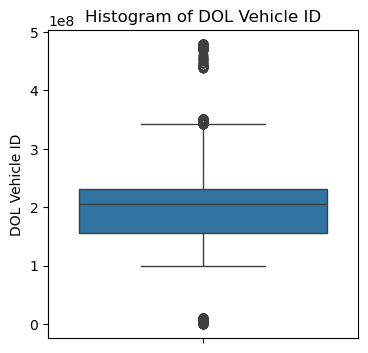

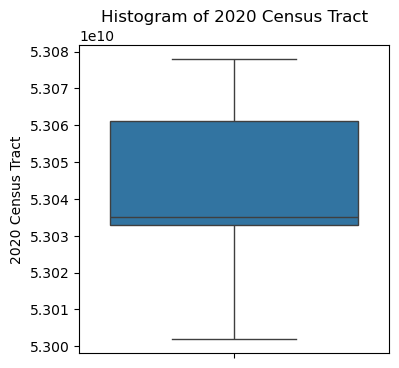

In [44]:
# Select numerical columns
numerical_cols = elec_ds.select_dtypes(include=['number']).columns

# Create histograms for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(4, 4))
    sns.boxplot(elec_ds[col])
    plt.title(f'Histogram of {col}')
    plt.show()

In [45]:
elec_ds['State'].unique()

array(['WA'], dtype=object)

In [46]:
elec_ds['County'].unique()

array(['Thurston', 'Island', 'Snohomish', 'King', 'Chelan', 'Kitsap',
       'Yakima', 'Whitman', 'Skagit', 'Pend Oreille', 'Pierce', 'Douglas',
       'Grant', 'Columbia', 'Spokane', 'Clark', 'San Juan', 'Whatcom',
       'Clallam', 'Cowlitz', 'Lewis', 'Benton', 'Walla Walla',
       'Jefferson', 'Kittitas', 'Okanogan', 'Mason', 'Stevens',
       'Garfield', 'Skamania', 'Franklin', 'Grays Harbor', 'Klickitat',
       'Adams', 'Pacific', 'Wahkiakum', 'Ferry', 'Asotin', 'Lincoln'],
      dtype=object)